<a href="https://colab.research.google.com/github/HaJiseon/Data-Analysis-Programming/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8%EA%B2%B0%EA%B3%BC_%EC%9D%98%EC%83%9D%EB%AA%85%EA%B3%B5%ED%95%99%EC%A0%84%EA%B3%B5_202013417_%ED%95%98%EC%A7%80%EC%84%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* 세계보건기구(WHO)에 따르면 뇌졸중은
전세계적으로 사망 원인 2위이며, 전체
사망자의 약 11%를 차지합니다.
* Stroke Prediction Dataset은 성별, 나이, 기저질환, 흡연 여부와 같은 입력변수를 기반으로 환자가 뇌졸중에 걸릴 가능성이 있는지 여부를 예측하는데 사용됩니다.
* 뇌졸중은 비만일수록 비만으로 인해 생기는 여러 합병증으로 인해 발병 위험률이 높아집니다.
* 그래서 이 dataset의 bmi 정보를 활용하여 뇌졸중 발병 위험 정도를 판단하고자 하였습니다.

* 속성 정보

  1) id : 고유 식별자

  2) gender : 남성, 여성

  3) age : 환자의 연령

  4) hypertension : 고혈압 없는 경우 0, 있는 경우 1

  5) heart_disease : 심장병 없는 경우 0, 심장병 있는 경우 1

  6) ever_married : No or Yes

  7) work_type : "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

  8) Residence_type : Rural or Urban

  9) avg_glucose_level: average glucose level in blood

  10) bmi: body mass index

  11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

  12) stroke: 1 if the patient had a stroke or 0 if not

In [2]:
# 데이터 준비
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [4]:
# 데이터 불러오기
df=pd.read_csv('/content/stroke.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
# 데이터 보기
# 데이터에 대한 간략한 설명과 전체 행수, 값의 개수를 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
# 데이터 보기
# 모든 필드에 대해서 count, mean, std, min, 백분위수를 알 수 있음
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
# 데이터 보기
# 데이터 타입 반환
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [ ]:
# 데이터 보기
# loc를 이용해 행 또는 열의 데이터 조회
df.loc[0]

id                              9046
gender                          Male
age                             67.0
hypertension                       0
heart_disease                      1
ever_married                     Yes
work_type                    Private
Residence_type                 Urban
avg_glucose_level             228.69
bmi                             36.6
smoking_status       formerly smoked
stroke                             1
Name: 0, dtype: object

In [ ]:
# 데이터 보기
# 처음 n줄의 데이터 출력, 입력값이 없을 경우 5줄을 기본으로 출력
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
# 데이터 보기
# 마지막 n줄의 데이터 출력, head와 마찬가지로 객체 내 타입 확인하는데 유용
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [ ]:
# 데이터 보기
# index(행)를 출력
df.index

RangeIndex(start=0, stop=5110, step=1)

In [ ]:
# 데이터 보기
# 데이터프레임의 행들의 값 확인
df.values

array([[9046, 'Male', 67.0, ..., 36.6, 'formerly smoked', 1],
       [51676, 'Female', 61.0, ..., nan, 'never smoked', 1],
       [31112, 'Male', 80.0, ..., 32.5, 'never smoked', 1],
       ...,
       [19723, 'Female', 35.0, ..., 30.6, 'never smoked', 0],
       [37544, 'Male', 51.0, ..., 25.6, 'formerly smoked', 0],
       [44679, 'Female', 44.0, ..., 26.2, 'Unknown', 0]], dtype=object)

In [ ]:
# 데이터 보기
# bmi 기준 오름차순 정렬
df.sort_values(by=['bmi'], axis=0)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1609,38043,Female,1.24,0,0,No,children,Rural,122.04,10.3,Unknown,0
3307,3205,Female,79.00,0,0,Yes,Self-employed,Urban,79.03,11.3,Unknown,0
2187,59993,Male,40.00,0,0,Yes,Private,Rural,60.96,11.5,never smoked,0
657,20364,Female,4.00,0,0,No,children,Urban,107.25,12.0,Unknown,0
922,45893,Female,8.00,0,0,No,children,Urban,106.51,12.3,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.00,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40.00,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,Female,45.00,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,Male,40.00,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


In [ ]:
# 데이터 보기
# bmi 기준 내림차순 정렬
df.sort_values(by=['bmi'], axis=0, ascending=False)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2128,56420,Male,17.0,1,0,No,Private,Rural,61.67,97.6,Unknown,0
4209,51856,Male,38.0,1,0,Yes,Private,Rural,56.90,92.0,never smoked,0
928,41097,Female,23.0,1,0,No,Private,Urban,70.03,78.0,smokes,0
544,545,Male,42.0,0,0,Yes,Private,Rural,210.48,71.9,never smoked,0
1559,37759,Female,53.0,0,0,Yes,Private,Rural,72.63,66.8,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


In [ ]:
# 데이터 보기
# 변수(열) 이름 정렬
df.sort_index(axis=1)

,Residence_type,age,avg_glucose_level,bmi,ever_married,gender,heart_disease,hypertension,id,smoking_status,stroke,work_type
0,Urban,67.0,228.69,36.6,Yes,Male,1,0,9046,formerly smoked,1,Private
1,Rural,61.0,202.21,NaN,Yes,Female,0,0,51676,never smoked,1,Self-employed
2,Rural,80.0,105.92,32.5,Yes,Male,1,0,31112,never smoked,1,Private
3,Urban,49.0,171.23,34.4,Yes,Female,0,0,60182,smokes,1,Private
4,Rural,79.0,174.12,24.0,Yes,Female,0,1,1665,never smoked,1,Self-employed
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,Urban,80.0,83.75,NaN,Yes,Female,0,1,18234,never smoked,0,Private
5106,Urban,81.0,125.20,40.0,Yes,Female,0,0,44873,never smoked,0,Self-employed
5107,Rural,35.0,82.99,30.6,Yes,Female,0,0,19723,never smoked,0,Self-employed
5108,Rural,51.0,166.29,25.6,Yes,Male,0,0,37544,formerly smoked,0,Private


In [ ]:
# 데이터 정제
# 데이터 개수 세기
df.count()

id                   5110
gender               5110
age                  5110
hypertension         5110
heart_disease        5110
ever_married         5110
work_type            5110
Residence_type       5110
avg_glucose_level    5110
bmi                  4909
smoking_status       5110
stroke               5110
dtype: int64

In [ ]:
# 데이터 정제
# 결측치 확인
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

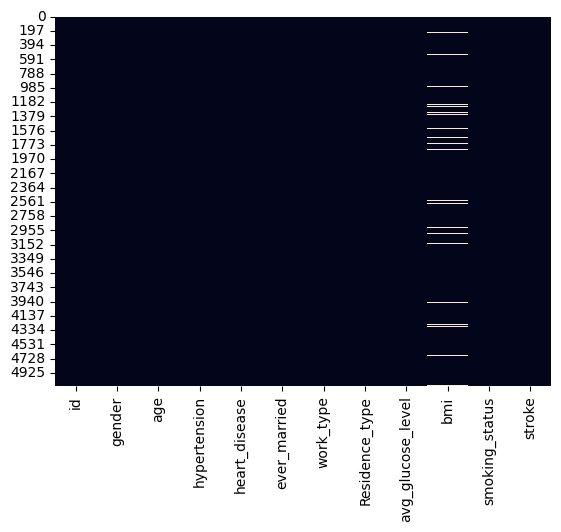

In [ ]:
# 결측치의 시각화
# heatmap를 통해 카테고리 값 변화를 한눈에 알기 쉬움
sns.heatmap(df.isnull(),cbar=False);

<Axes: >

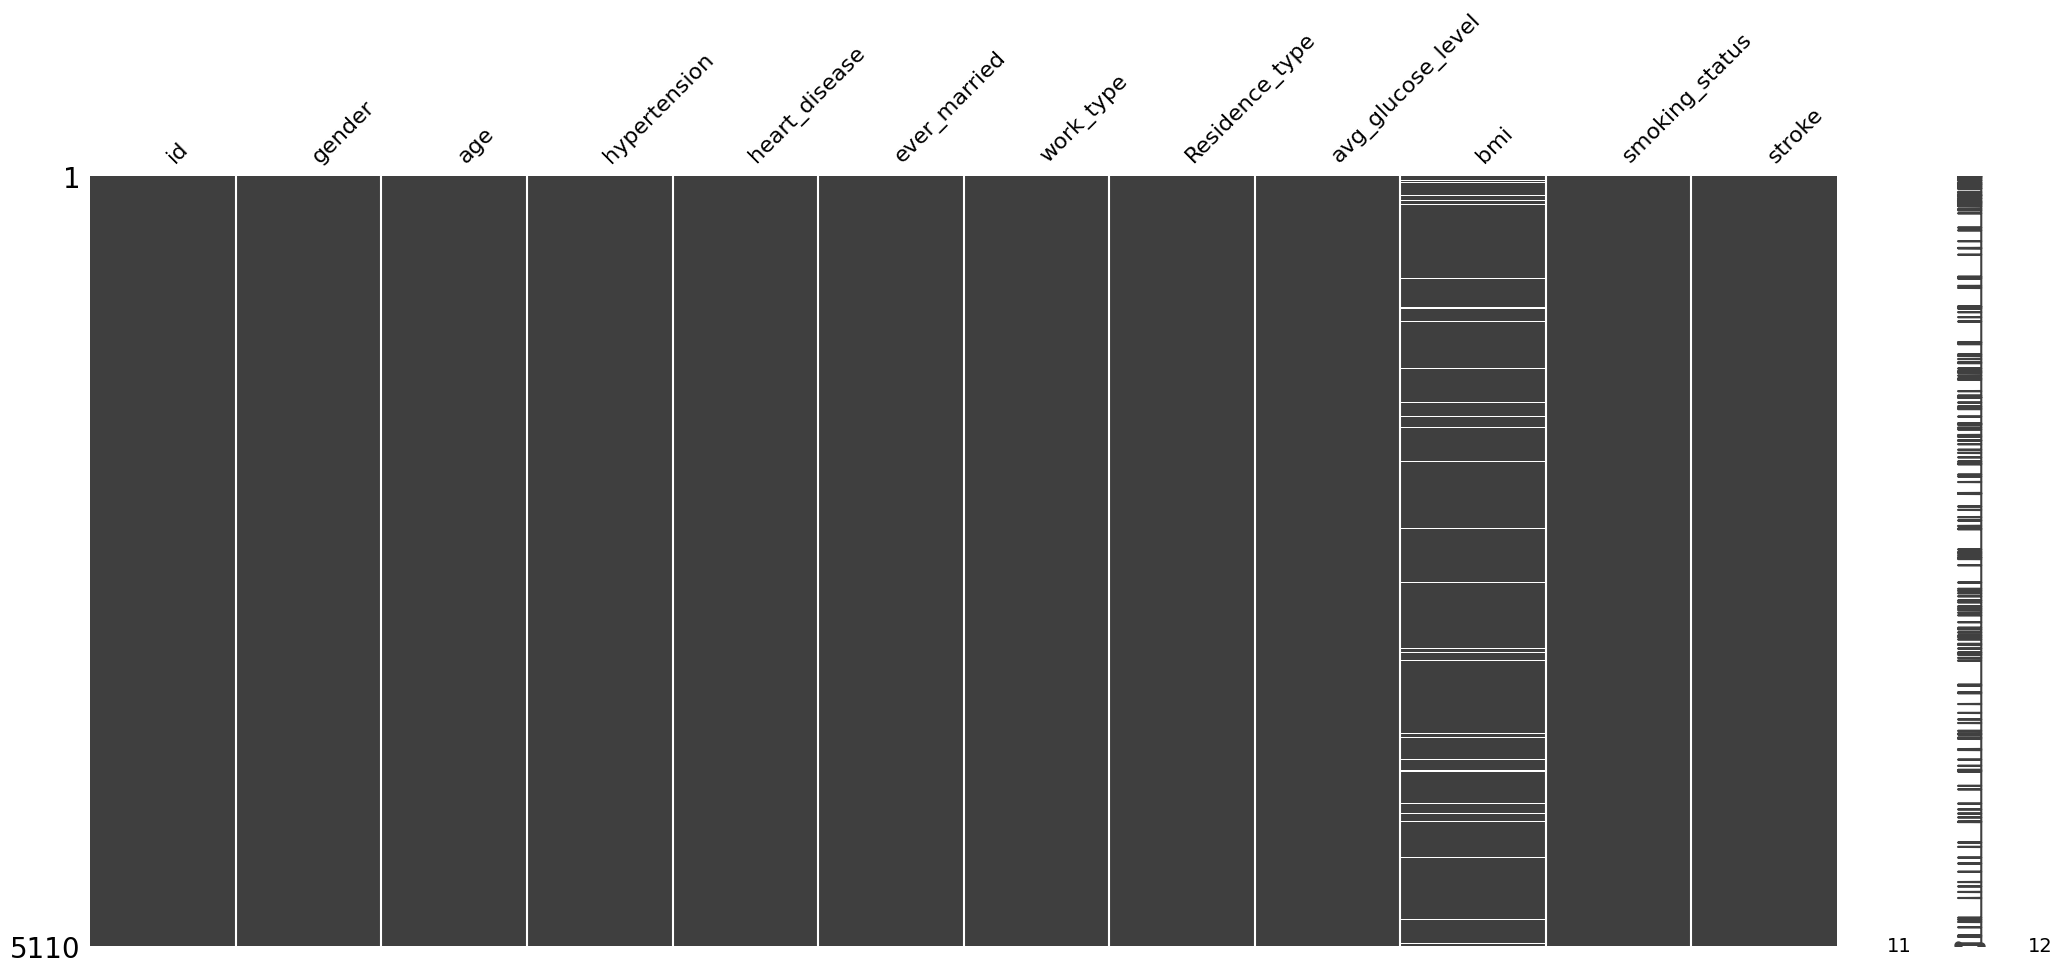

In [5]:
import missingno as msno # missingno 패키지 임포트
msno.matrix(df) # 매트릭스 결측치 시각화

<Axes: >

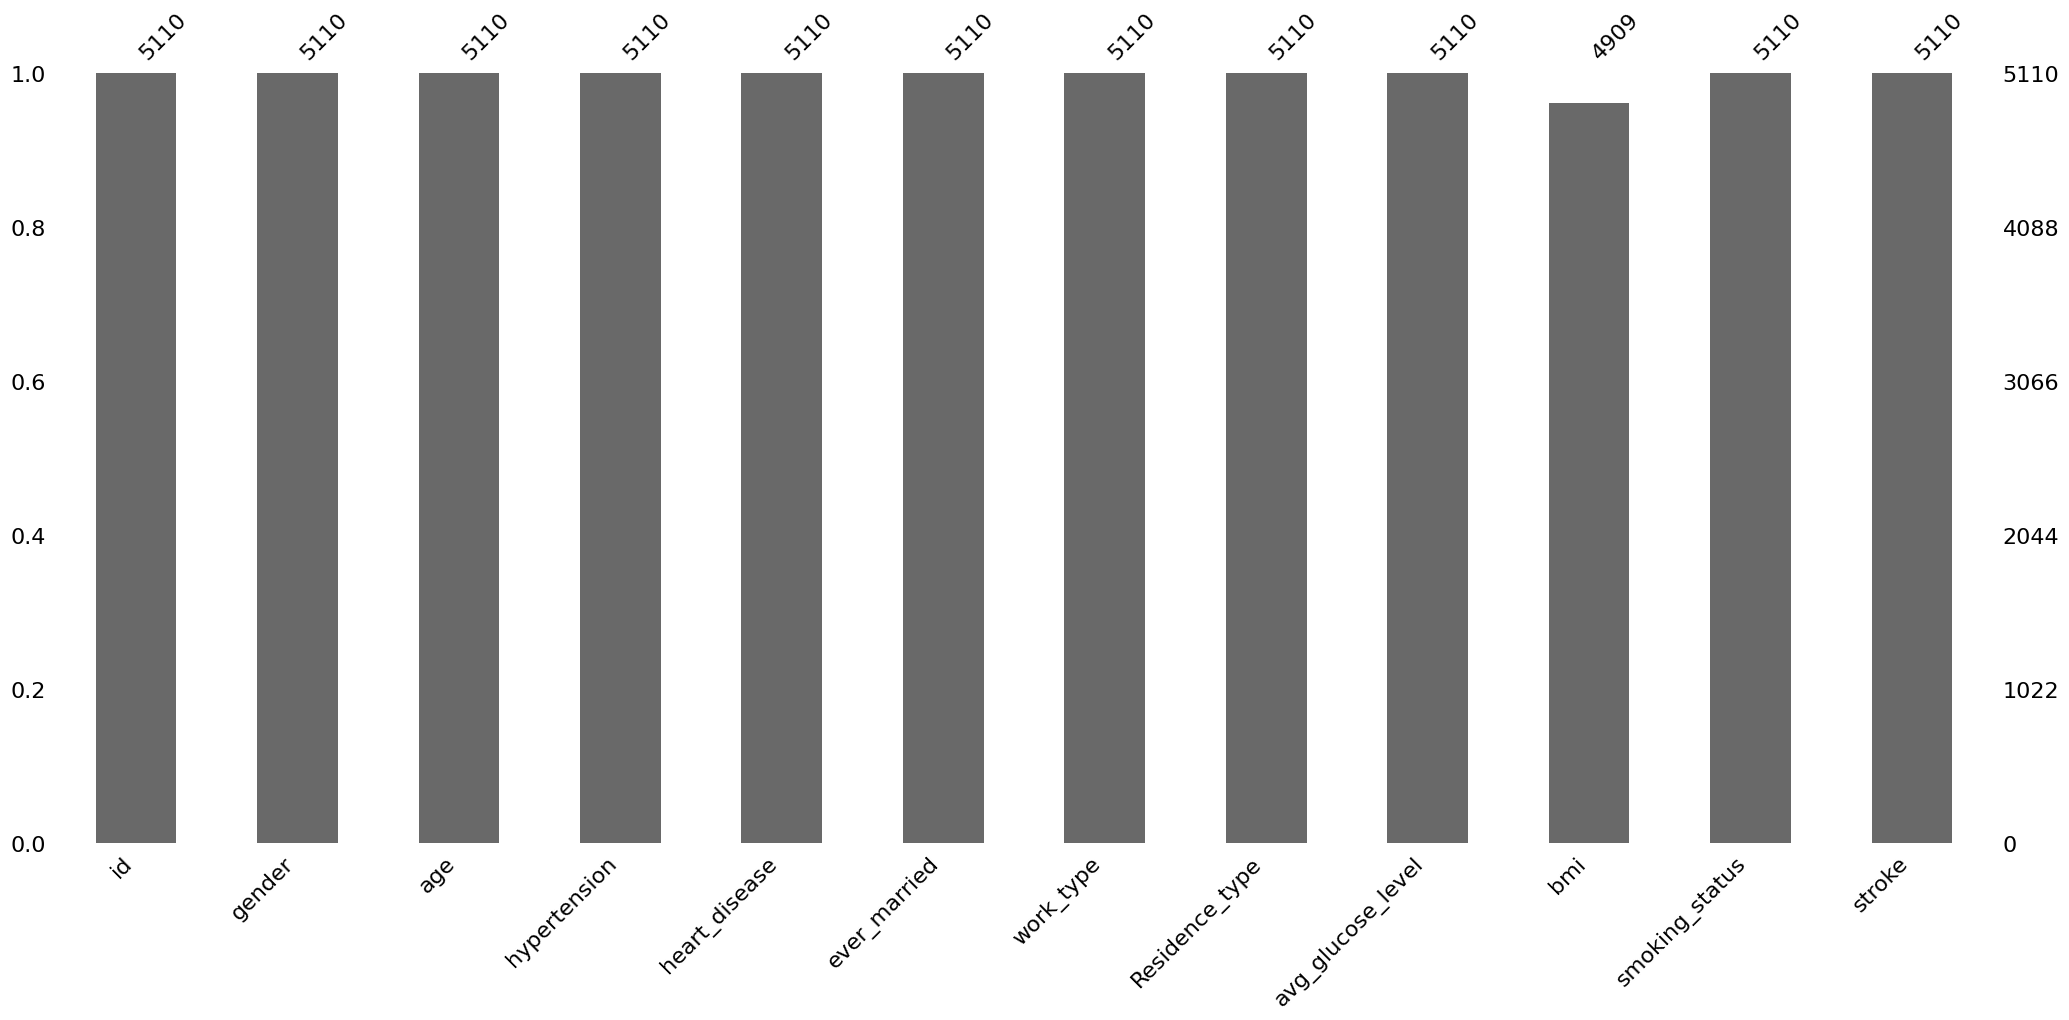

In [6]:
msno.bar(df) # 바챠트 결측치 시각화

In [7]:
# missingno : 결측치를 파악하기 쉽게 시각화 해주는 라이브러리
!pip install missingno

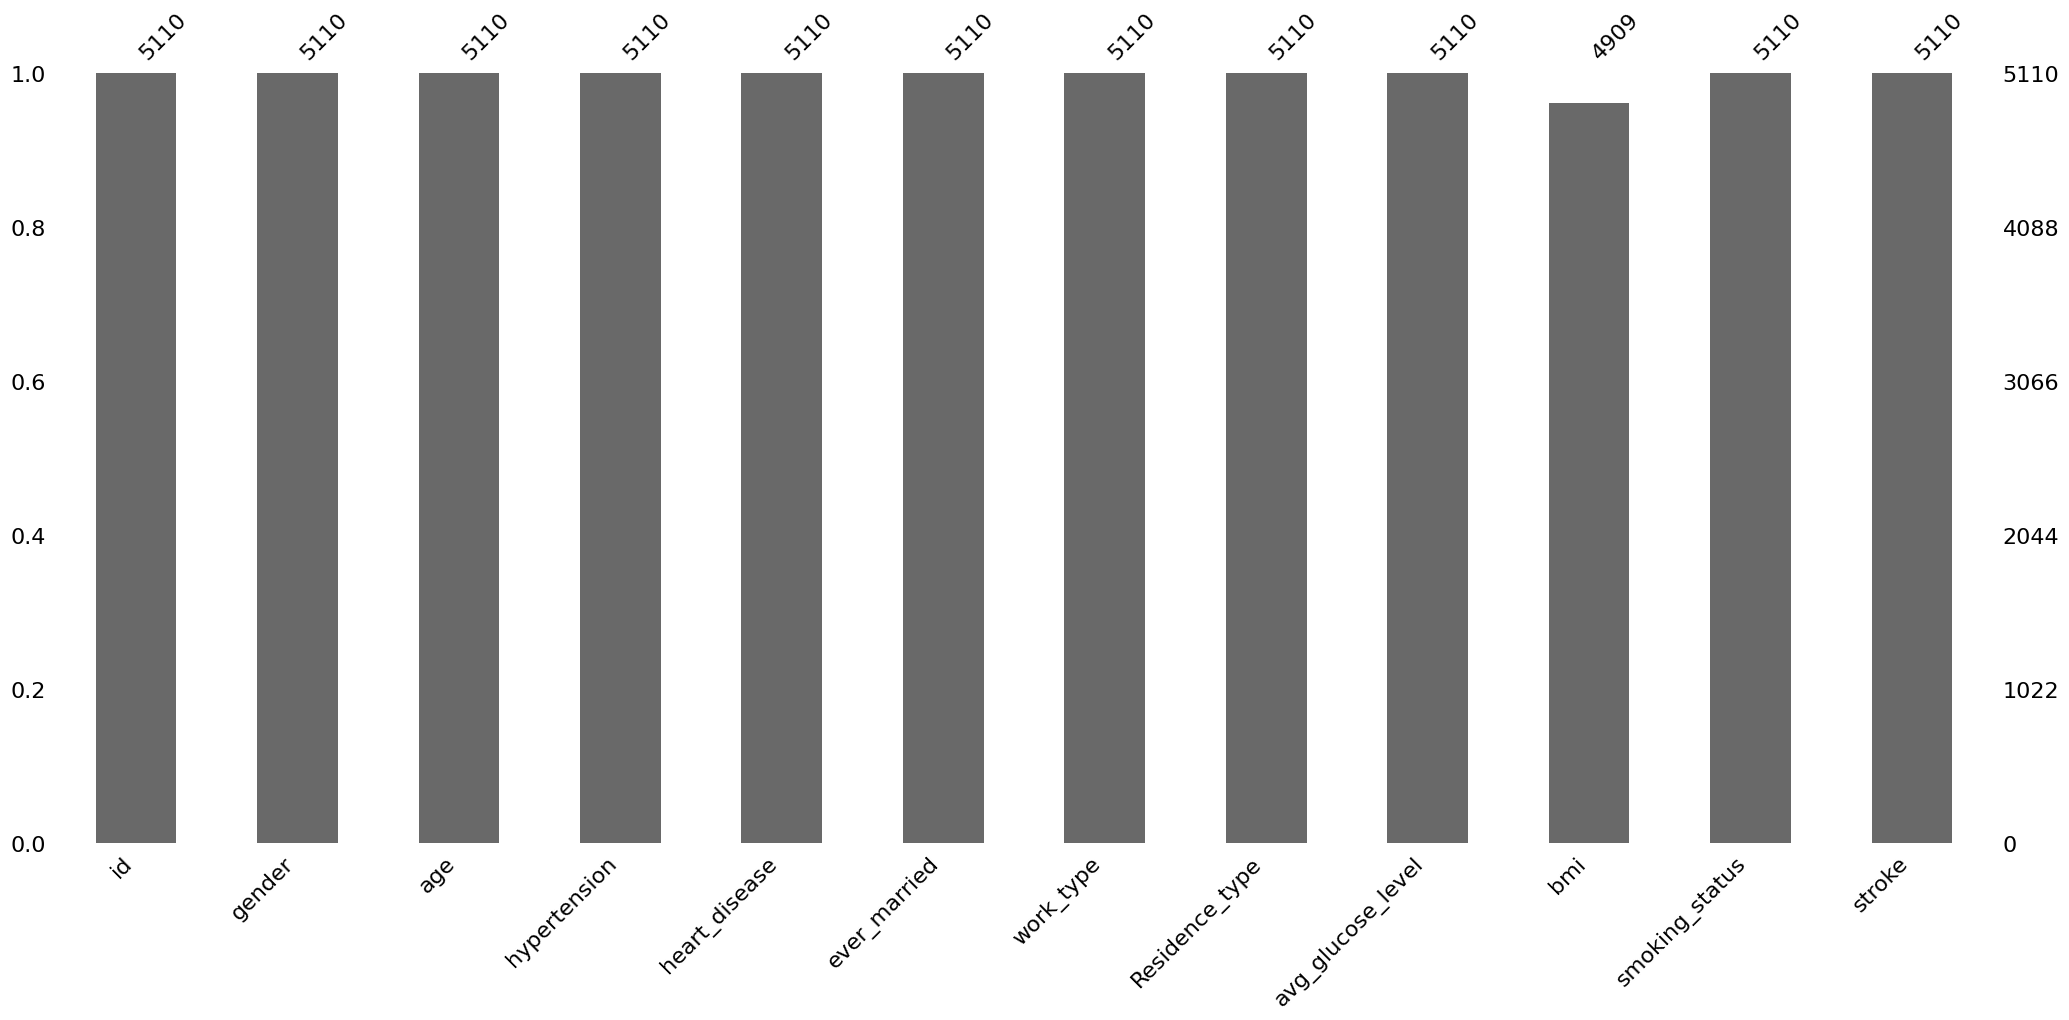

In [8]:
# 막대 그래프 형태로 시각화
msno.bar(df);

<Axes: >

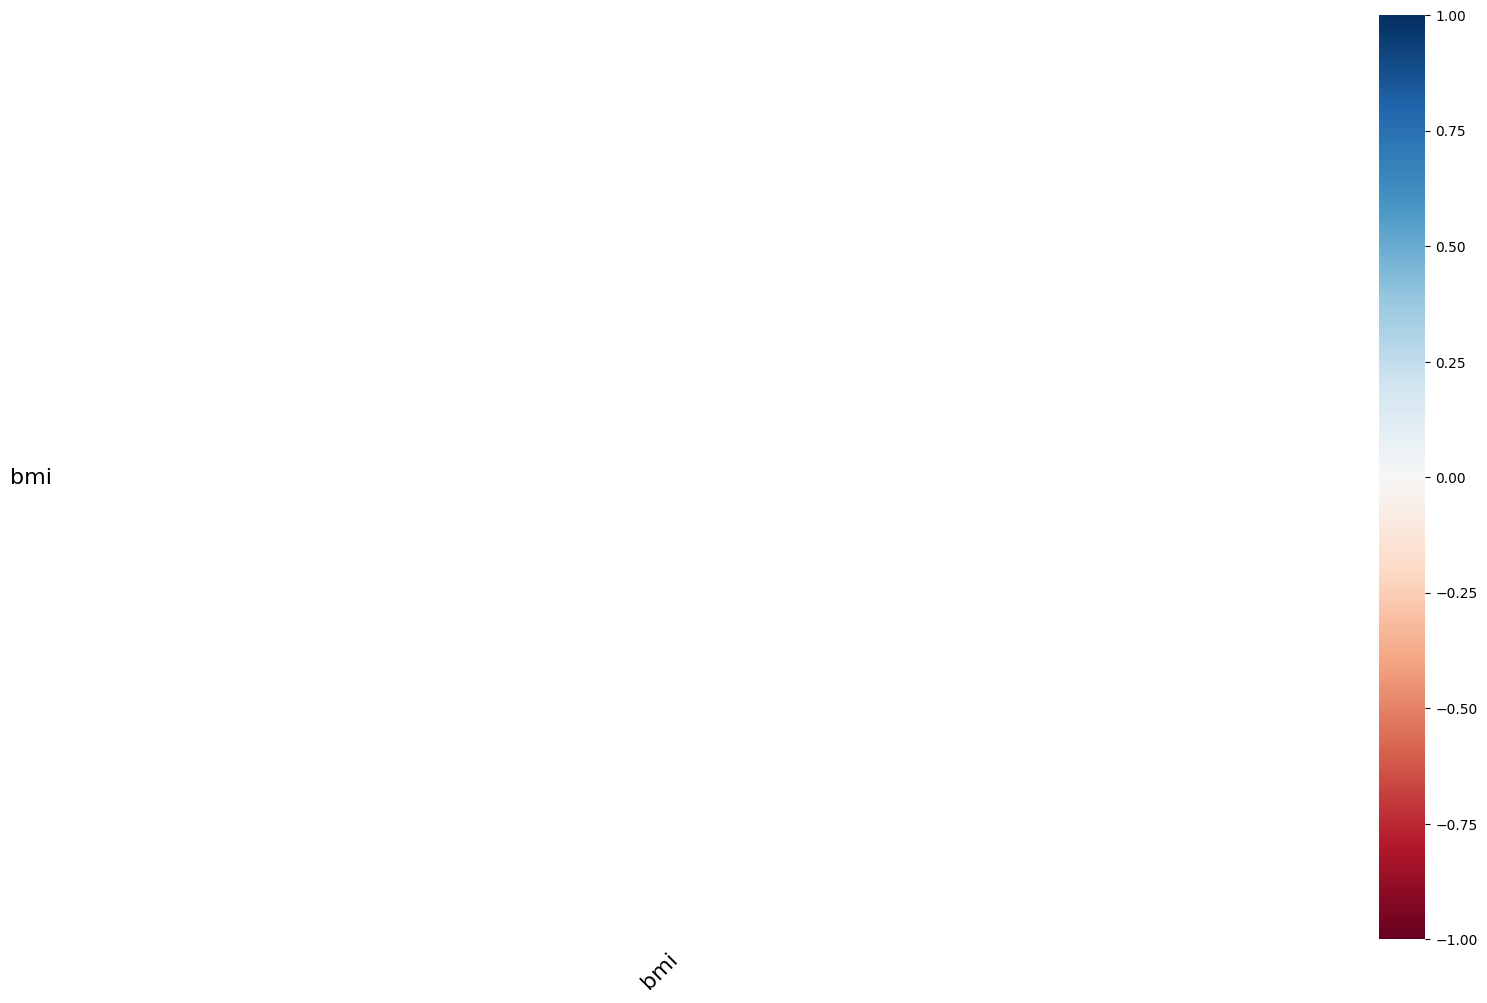

In [9]:
msno.heatmap(df) # 히트맵 결측치 시각화

<Axes: >

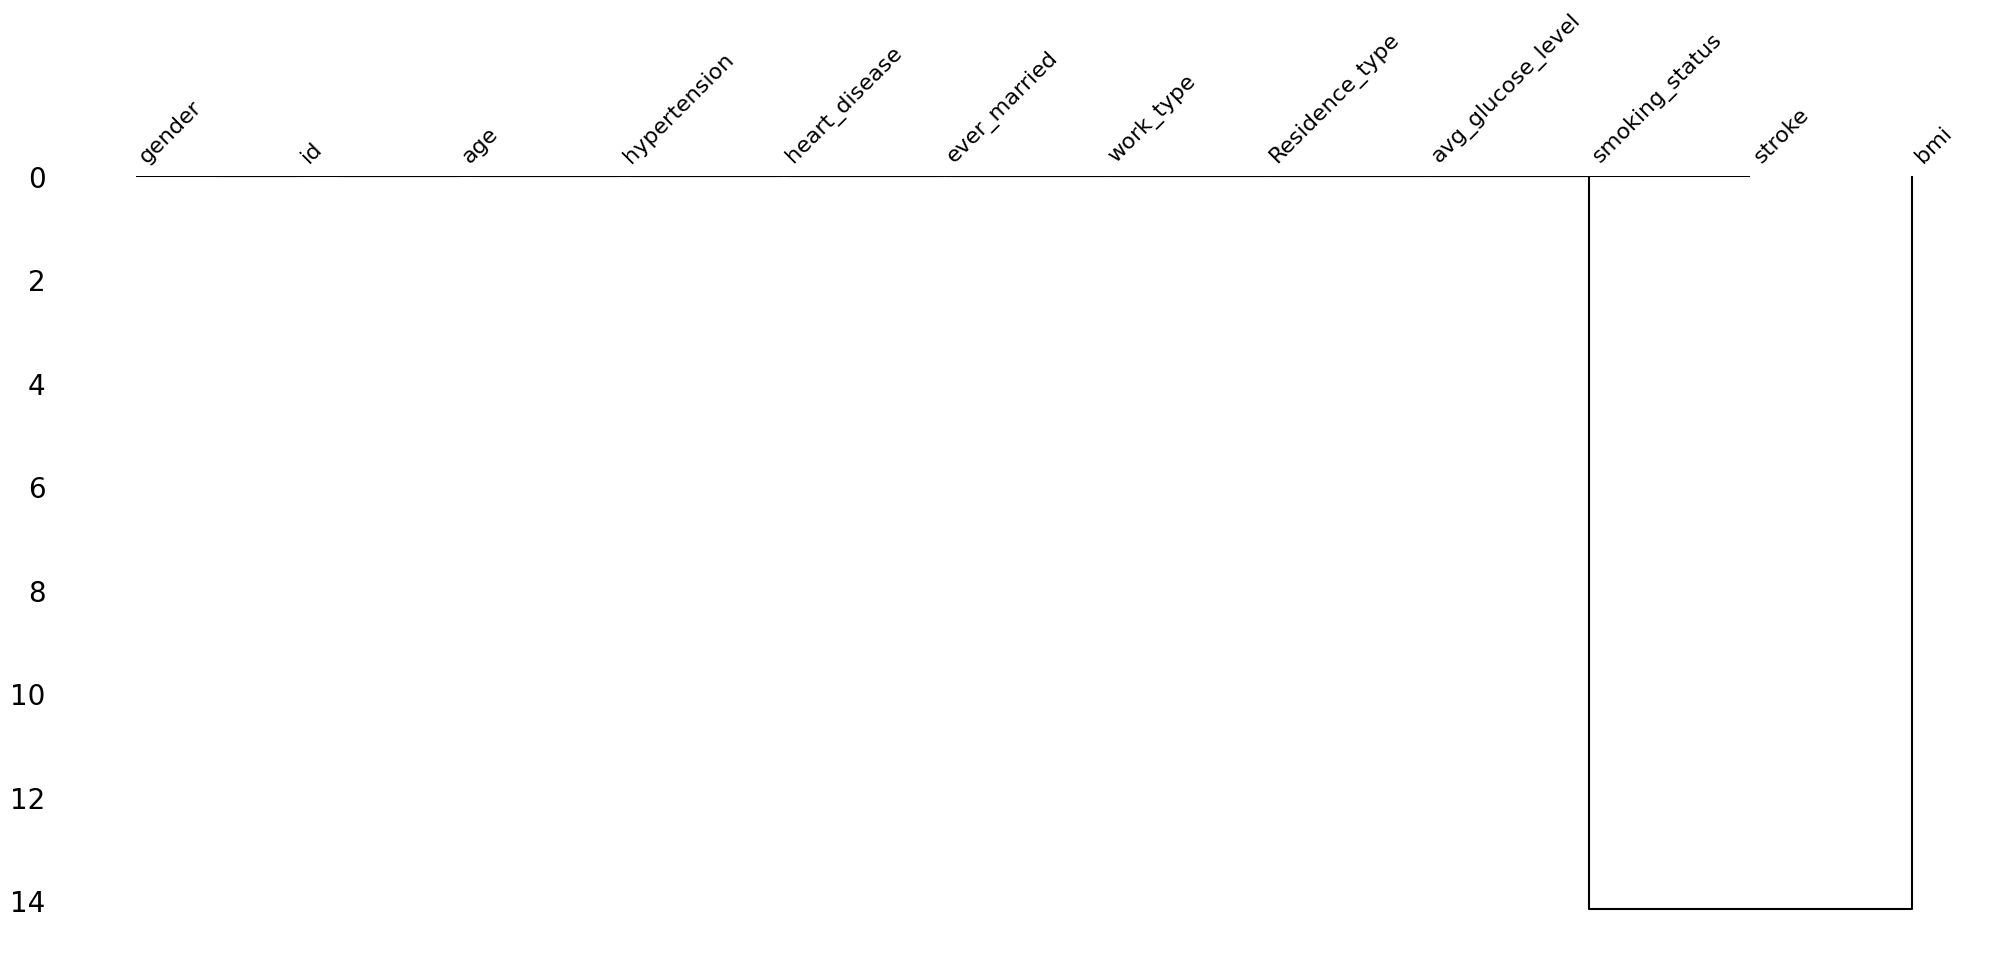

In [10]:
msno.dendrogram(df) # 덴드로그램 결측치 시각화

In [11]:
# bmi 결측 제거
df['bmi'].value_counts()

28.7    41
28.4    38
26.7    37
27.6    37
26.1    37
        ..
48.7     1
49.2     1
51.0     1
49.4     1
14.9     1
Name: bmi, Length: 418, dtype: int64

In [ ]:
# bmi 대체
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

In [ ]:
# 데이터의 행이나 열을 삭제
df=df.dropna(thresh=int(len(df) * 0.5), axis=1)

<Axes: >

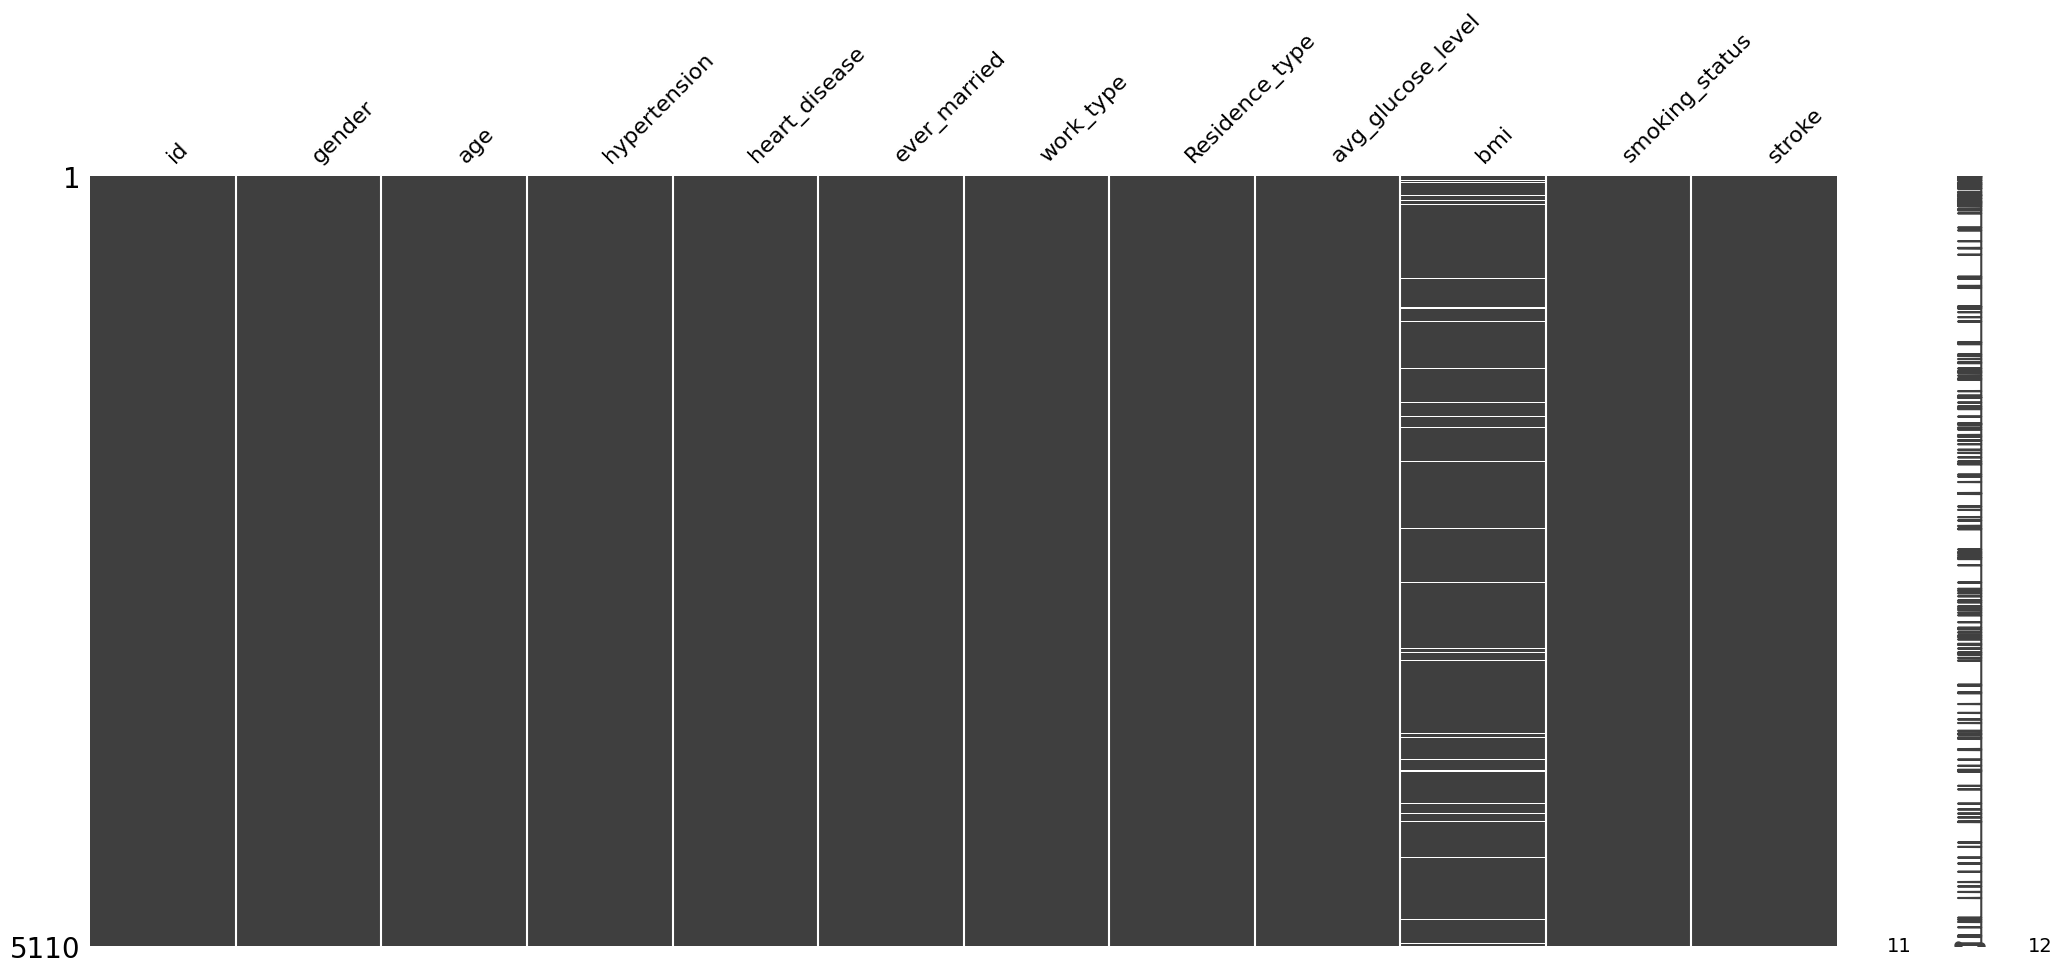

In [12]:
msno.matrix(df) #결측치 제거 확인

In [17]:
# 데이터 탐색
# bmi 변수 범주화 : cut() 함수 사용
# 20 미만 : 저체중, 20-24 : 정상, 25-29 : 과체중, 30 이상 : 비만
bins=[1,18.5, 25, 30, 100]
df_bmi=pd.cut(df['bmi'], bins, labels=['저체중', '정상','과체중', '비만'])
df['bmi_class'] = df_bmi
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_class
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,비만
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,NaN
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,비만
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,비만
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,정상
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0,NaN
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,비만
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,비만
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,과체중


In [18]:
# 데이터 탐색
# bmi_class에 어떤 종류가 있는지 확인
df.bmi_class.unique()

['비만', NaN, '정상', '과체중', '저체중']
Categories (4, object): ['저체중' < '정상' < '과체중' < '비만']

In [19]:
# 데이터 탐색
# '저체중'과 일치하는 요소 확인
df[df.bmi_class.isin(['저체중'])]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_class
230,10552,Female,81.00,0,0,Yes,Self-employed,Rural,81.95,16.9,never smoked,1,저체중
249,30669,Male,3.00,0,0,No,children,Rural,95.12,18.0,Unknown,0,저체중
251,16523,Female,8.00,0,0,No,Private,Urban,110.89,17.6,Unknown,0,저체중
255,52800,Female,52.00,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0,저체중
282,33759,Female,3.00,0,0,No,children,Urban,73.74,16.0,Unknown,0,저체중
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5078,27446,Female,8.00,0,0,No,children,Urban,76.31,15.5,Unknown,0,저체중
5079,42709,Male,1.72,0,0,No,children,Urban,77.28,17.1,Unknown,0,저체중
5089,56714,Female,0.72,0,0,No,children,Rural,62.13,16.8,Unknown,0,저체중
5095,68598,Male,1.08,0,0,No,children,Rural,79.15,17.4,Unknown,0,저체중


In [20]:
# 데이터 탐색
# '정상'과 일치하는 요소 확인
df[df.bmi_class.isin(['정상'])]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_class
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,정상
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1,정상
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1,정상
20,70630,Female,71.0,0,0,Yes,Govt_job,Rural,193.94,22.4,smokes,1,정상
25,70822,Male,80.0,0,0,Yes,Self-employed,Rural,104.12,23.5,never smoked,1,정상
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5090,4211,Male,26.0,0,0,No,Govt_job,Rural,100.85,21.0,smokes,0,정상
5094,28048,Male,13.0,0,0,No,children,Urban,82.38,24.3,Unknown,0,정상
5101,36901,Female,45.0,0,0,Yes,Private,Urban,97.95,24.5,Unknown,0,정상
5102,45010,Female,57.0,0,0,Yes,Private,Rural,77.93,21.7,never smoked,0,정상


In [21]:
# 데이터 탐색
# '과체중'과 일치하는 요소 확인
df[df.bmi_class.isin(['과체중'])]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_class
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,과체중
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1,과체중
10,12109,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1,과체중
12,12175,Female,54.0,0,0,Yes,Private,Urban,104.51,27.3,smokes,1,과체중
14,5317,Female,79.0,0,1,Yes,Private,Urban,214.09,28.2,never smoked,1,과체중
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5084,29540,Male,67.0,0,0,Yes,Private,Rural,97.04,26.9,smokes,0,과체중
5096,41512,Male,57.0,0,0,Yes,Govt_job,Rural,76.62,28.2,never smoked,0,과체중
5100,68398,Male,82.0,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0,과체중
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,과체중


In [22]:
# 데이터 탐색
# '비만'과 일치하는 요소 확인
df[df.bmi_class.isin(['비만'])]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_class
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,비만
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,비만
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,비만
11,12095,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1,비만
15,58202,Female,50.0,1,0,Yes,Self-employed,Rural,167.41,30.9,never smoked,1,비만
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5092,56799,Male,76.0,0,0,Yes,Govt_job,Urban,82.35,38.9,never smoked,0,비만
5097,64520,Male,68.0,0,0,Yes,Self-employed,Urban,91.68,40.8,Unknown,0,비만
5103,22127,Female,18.0,0,0,No,Private,Urban,82.85,46.9,Unknown,0,비만
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,비만


In [23]:
# 범주 안에 '비만'이 있다면 매우 위험을 출력하고, 아니라면 주의를 출력
# 이를 통해 뇌졸중 발병 위험도가 높은 환자를 추려내 주의 관찰할 수 있음
def func1(row):
  if '비만' in row:
    return '매우 위험'
  else:
    return '주의'

df['발병'] = df['bmi_class'].apply(func1)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_class,발병
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,비만,매우 위험
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,NaN,NaN
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,비만,매우 위험
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,비만,매우 위험
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,정상,주의


<Axes: xlabel='stroke', ylabel='count'>

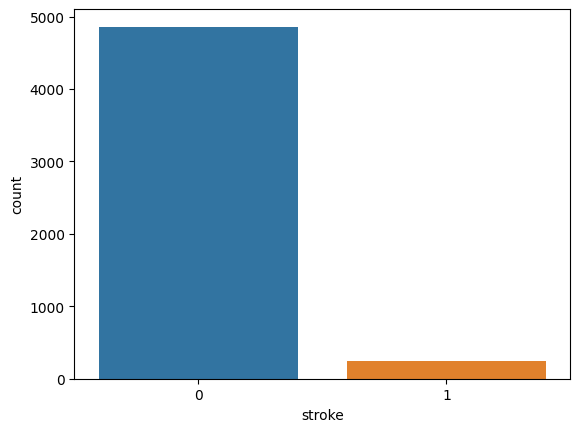

In [27]:
# 데이터 시각화 분석
# 뇌졸중 환자 범주 확인
sns.countplot(x='stroke', data=df)

<Axes: xlabel='stroke', ylabel='count'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51200 (\N{HANGUL SYLLABLE JEO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from current font.
  func(

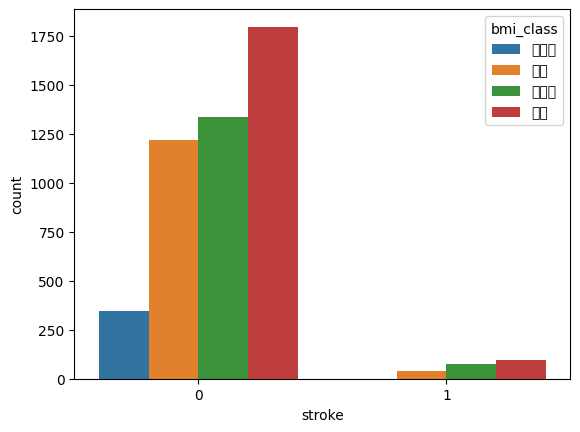

In [28]:
# 데이터 시각화 분석
# 뇌졸중 환자 여부별 bmi_class 확인(비만 환자 주로 확인)
sns.countplot(x='stroke', hue='bmi_class', data=df)

<Axes: >

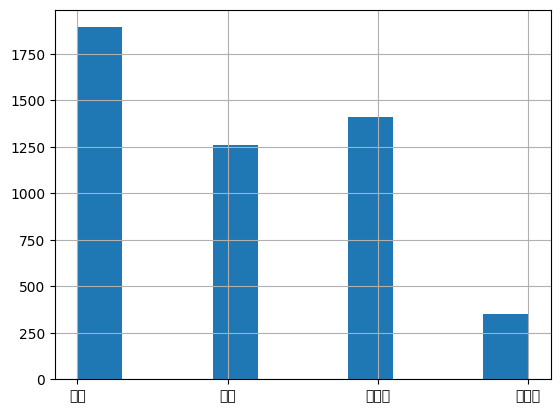

In [29]:
# 데이터 시각화 분석
# bmi_class 분포 확인
df['bmi_class'].hist()

<Axes: >

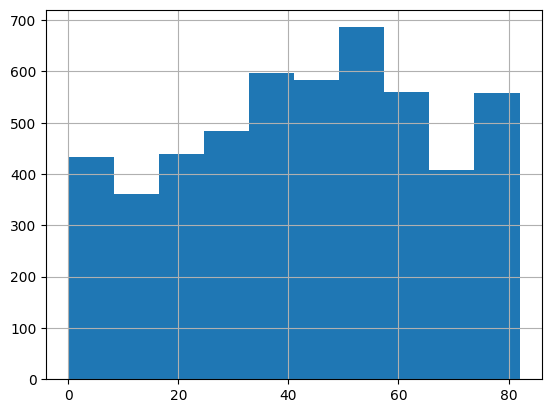

In [ ]:
# 데이터 시각화 분석
# 나이 분포 확인
# 뇌졸중은 주로 50대 이후 장,노년층에 발병
# 30~40대에도 부쩍 증가추세를 보이고 있으므로 주의 요함
df['age'].hist()

<Axes: xlabel='bmi_class', ylabel='count'>

/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51200 (\N{HANGUL SYLLABLE JEO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from current font.
  func(*args,

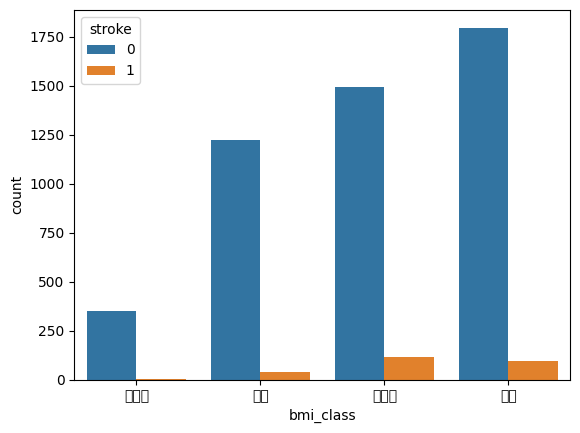

In [ ]:
# 데이터 시각화 분석
# bmi_class별 뇌졸중 환자 확인
sns.countplot(x='bmi_class', hue='stroke', data=df)